**Question 1)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

**Question 2)**

In [2]:
df = pd.read_csv('/content/housing.csv')
#finding number of rows
no_of_rows = df.shape[0]
print("number of rows:", no_of_rows)
#dispaly the content of the file
print("file content")
print(df)

number of rows: 20640
file content
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       populatio

**Question 3)**

In [3]:
#finding the no of rows and columns(shape of dataframe)
print("Shape of dataset:", df.shape)
#descriptive statistics using describe method
stats = df.describe()
print(stats)

Shape of dataset: (20640, 10)
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.

Question 4)

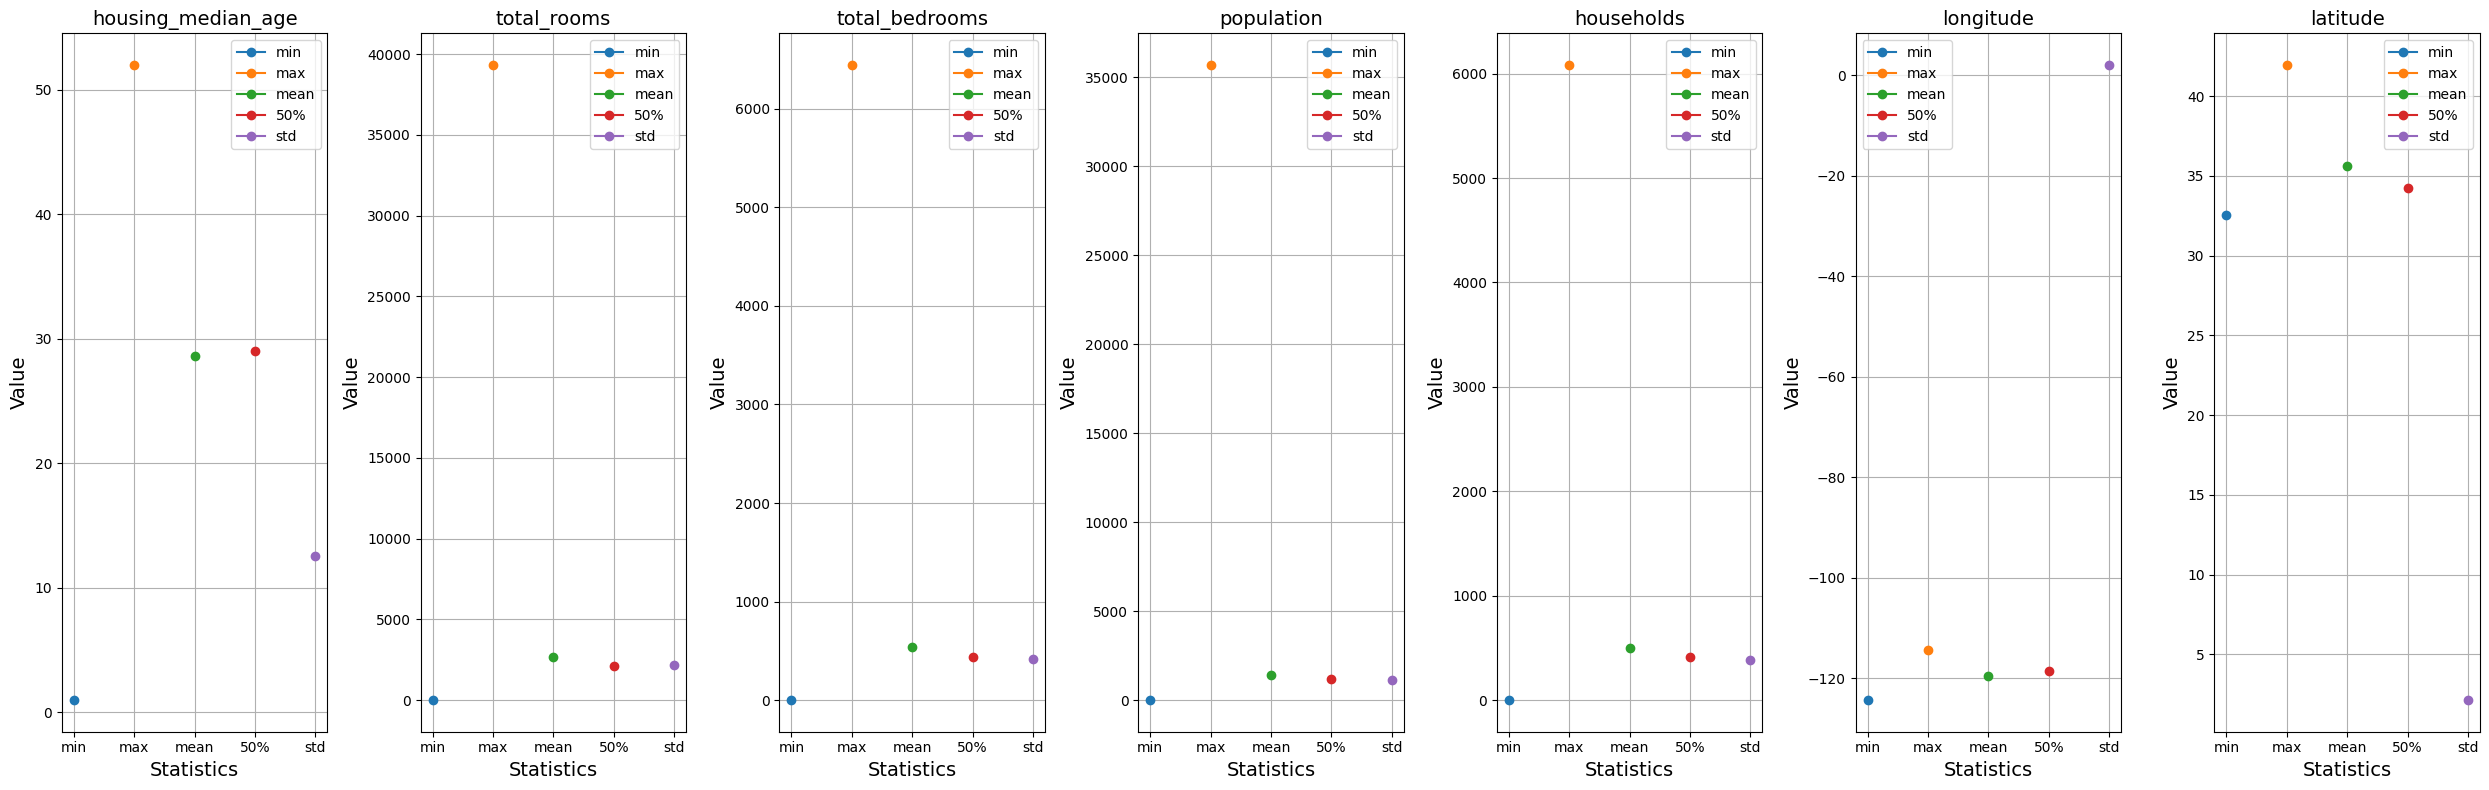

In [4]:
# Visualize for housing_median_age, total_rooms, total_bedrooms, population, households,longitude, latitude
stats = df[['housing_median_age','total_rooms','total_bedrooms','population','households', 'longitude', 'latitude']].describe().T[['min', 'max', 'mean', '50%', 'std']]

# Number of subplots (one for each column)
num_columns = stats.shape[0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(25, 8))

# Iterate over each column and create a plot
for i, column in enumerate(stats.index):
    for stat in ['min', 'max', 'mean', '50%', 'std']:
        axes[i].plot([stat], [stats.loc[column, stat]], marker='o', label=stat)
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel('Statistics', fontsize=14)
    axes[i].set_ylabel('Value', fontsize=14)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

Question 5)


Missing values before imputation:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


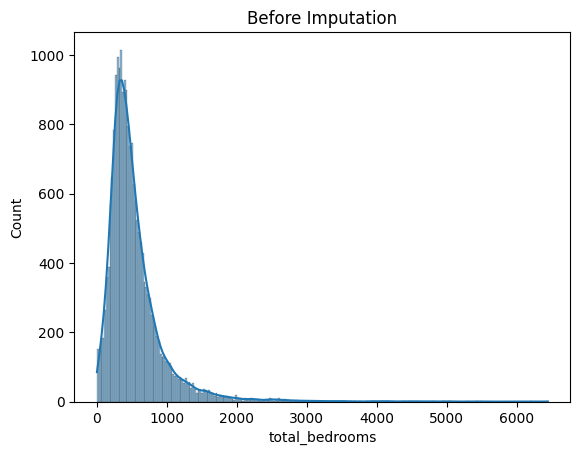

In [5]:
no_of_missing_before = df.isnull().sum()
print("Missing values before imputation:")
print(no_of_missing_before)
sns.histplot(df['total_bedrooms'], kde=True)
plt.title('Before Imputation')
plt.show()

Question 6)

<ipython-input-6-f878f7f9aa5f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)



Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


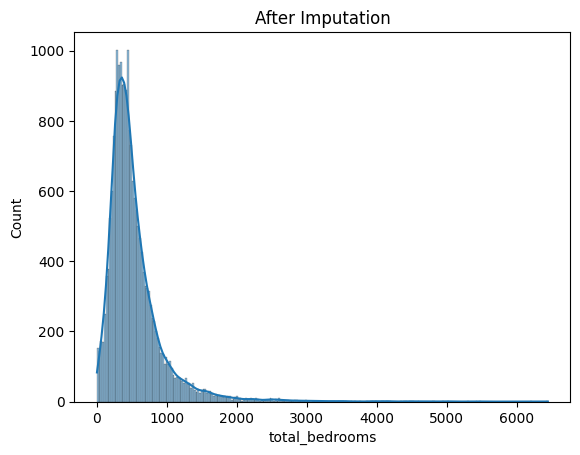

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
no_of_missing_after = df.isnull().sum()
print("\nMissing values after imputation:")
print(no_of_missing_after)
sns.histplot(df['total_bedrooms'], kde=True)
plt.title('After Imputation')
plt.show()

Question 7)

In [7]:
#finding no of duplicate value
dupli = df.duplicated().sum()
print("number of duplicates:", dupli)
df.drop_duplicates()

number of duplicates: 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


Question 8)

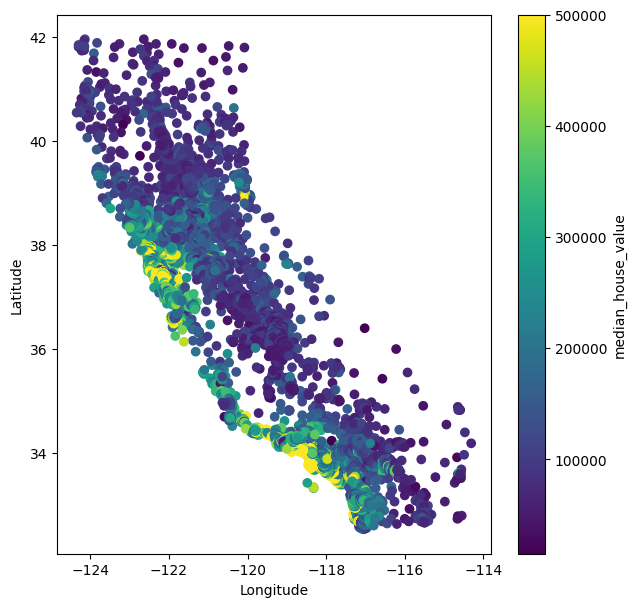

In [8]:
plt.figure(figsize=(7, 7))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis' )
cbar = plt.colorbar(scatter)
cbar.set_label('median_house_value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Question 9)

Number of houses with total rooms >= 1500: 15044


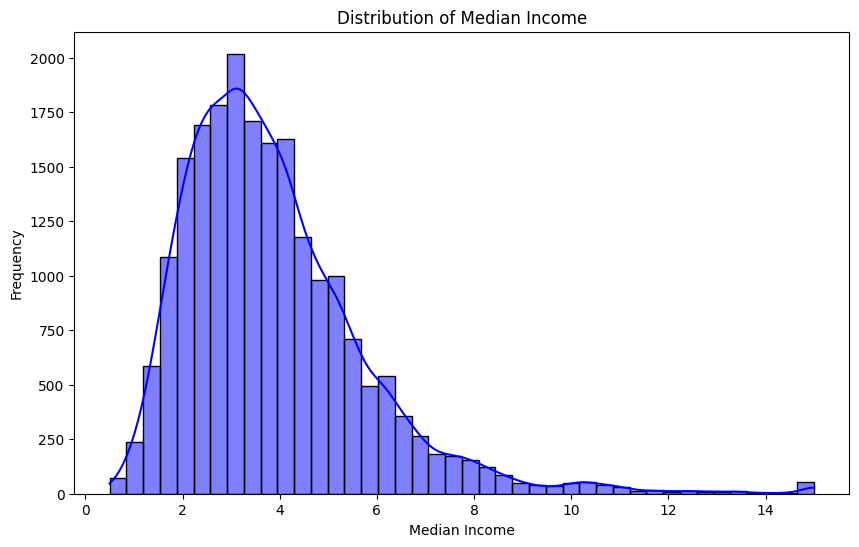

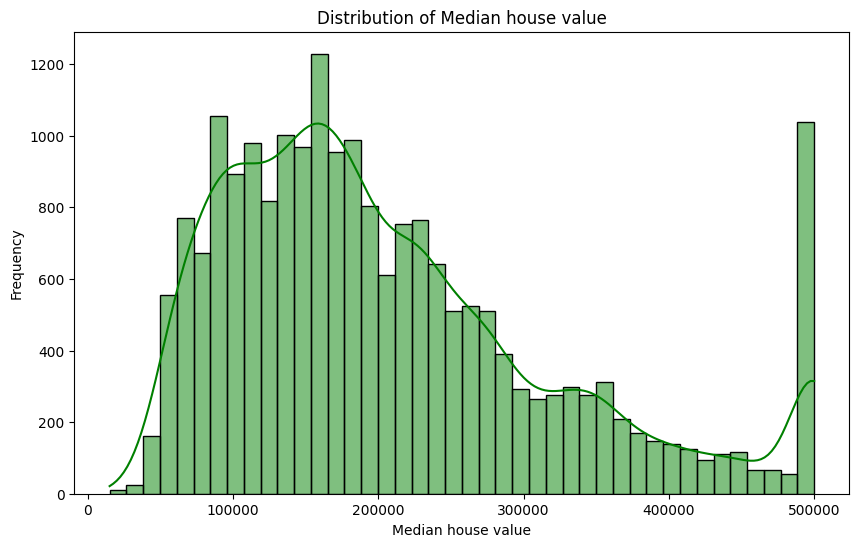

In [9]:
# Number of houses having total rooms >= 1500
houses_with_many_rooms = df[df['total_rooms'] >= 1500].shape[0]
print("Number of houses with total rooms >= 1500:", houses_with_many_rooms)

# Visualize the distribution of median income
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'],bins = 42, kde=True, color='blue')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of median house value
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'],bins = 42,kde=True, color='green')
plt.title('Distribution of Median house value')
plt.xlabel('Median house value')
plt.ylabel('Frequency')
plt.show()

Question 10)

                longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude             ... median_income  \
                      75%     max    count       mean  ...           75%   
ocean_proximity                                        ...                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  ...      5.180500   
INLAND          -117.8400 -114.31   6551.0  36.731829  ...      3.961500   
ISLAND     

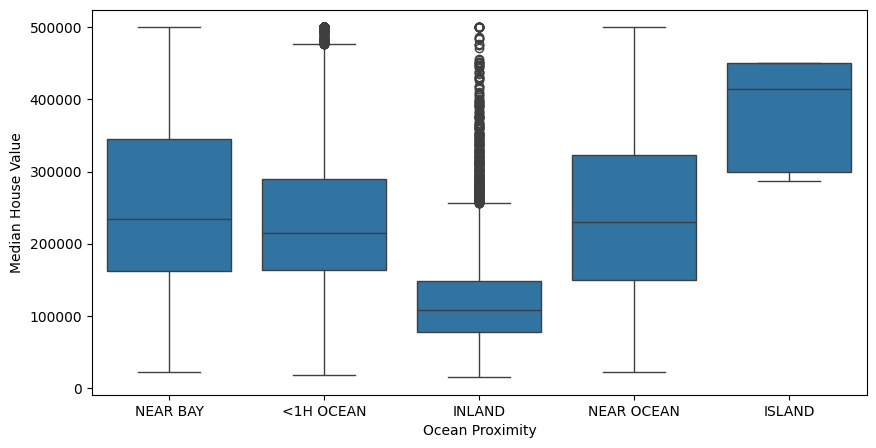

In [10]:
#grouping the given dataframe according to ocean_proximity
grouped = df.groupby('ocean_proximity').describe()
print(grouped)
#plotting the box plot with target variable as median_house_value
plt.figure(figsize=(10, 5))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()
# Label encode the ocean_proximity
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])


Question 11)

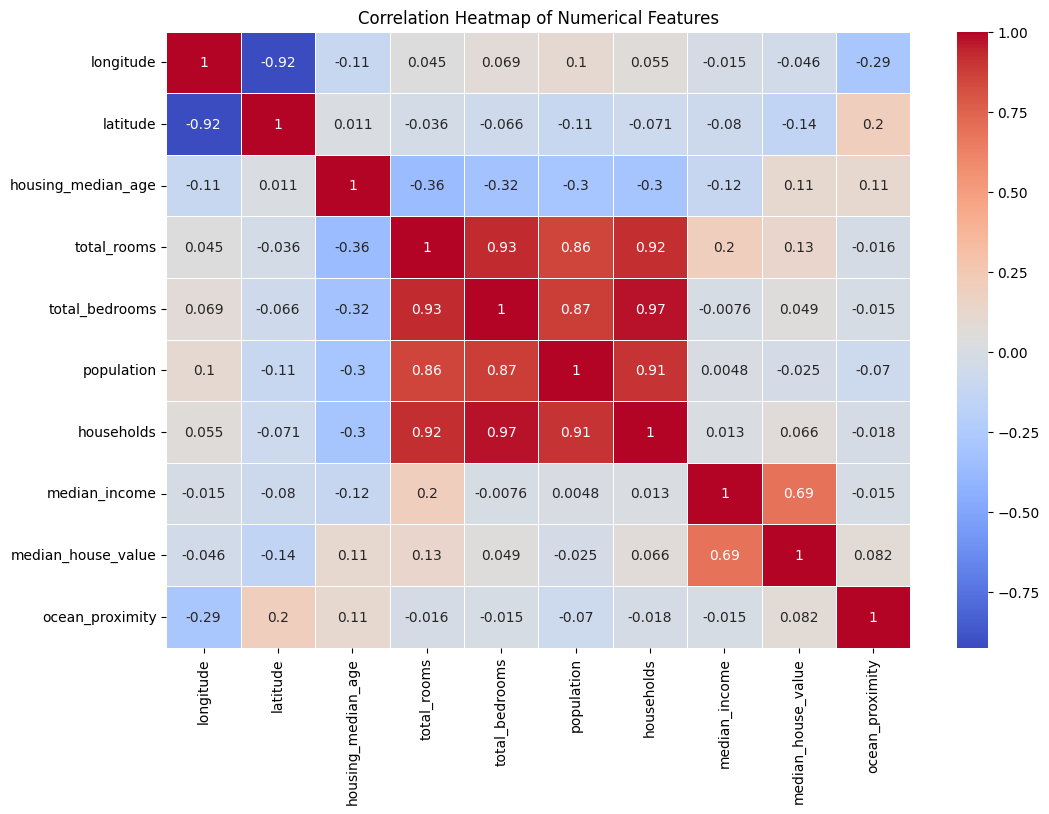

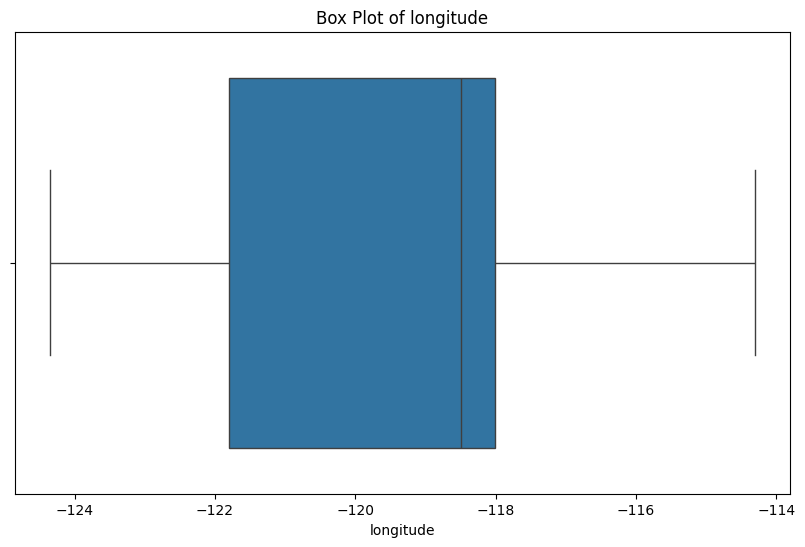

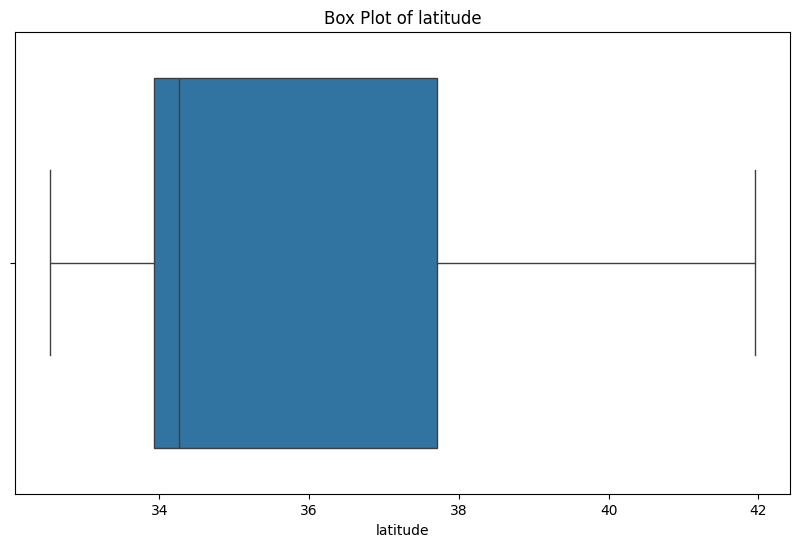

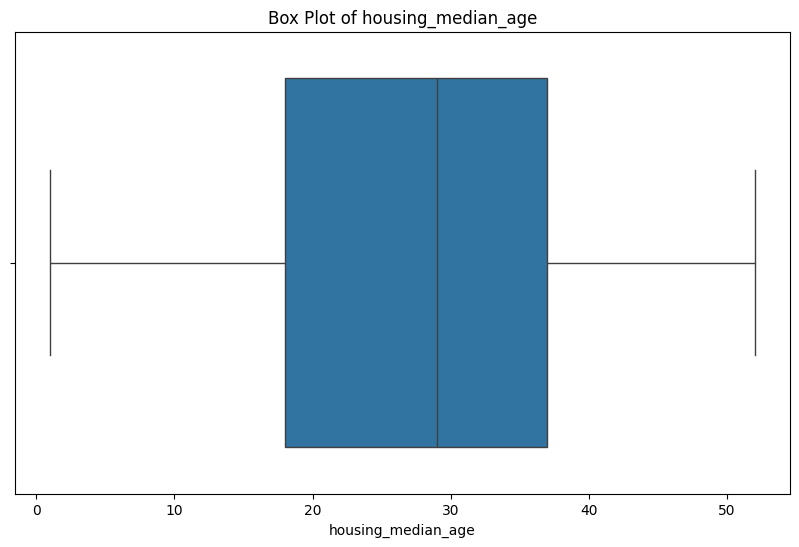

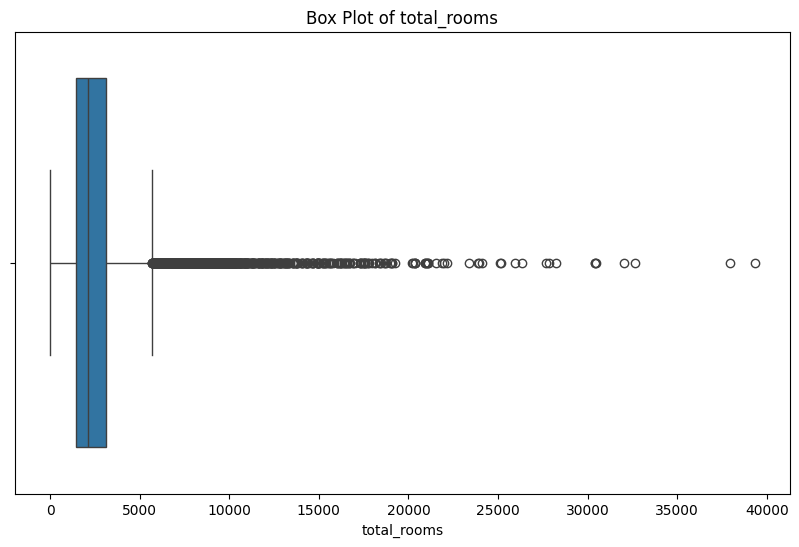

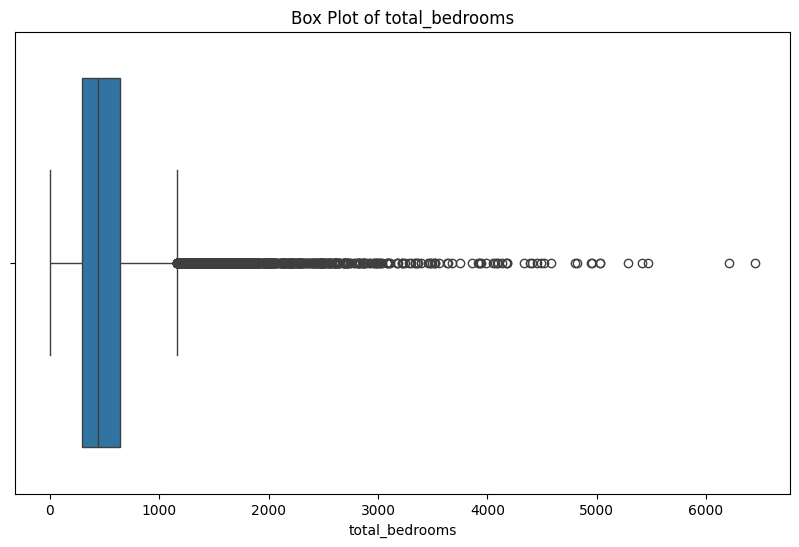

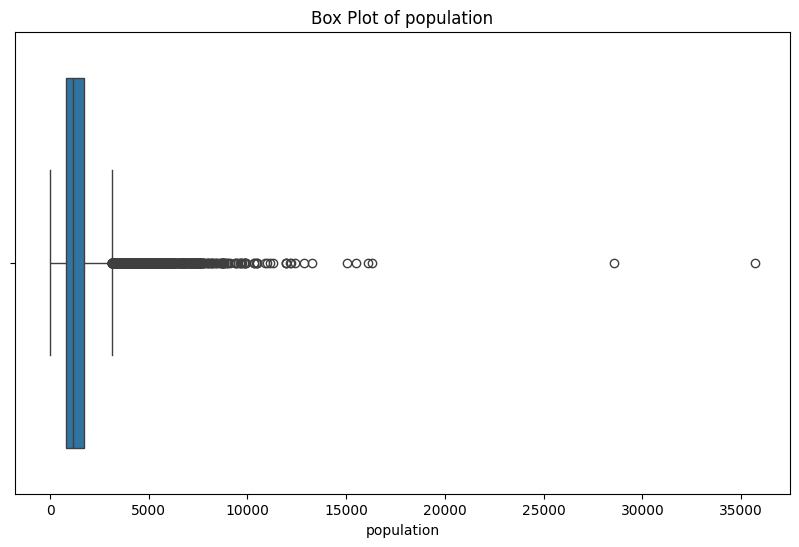

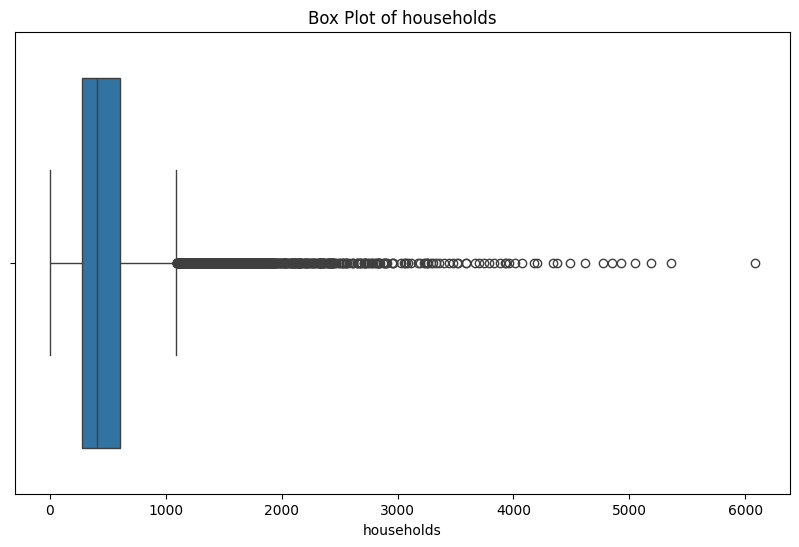

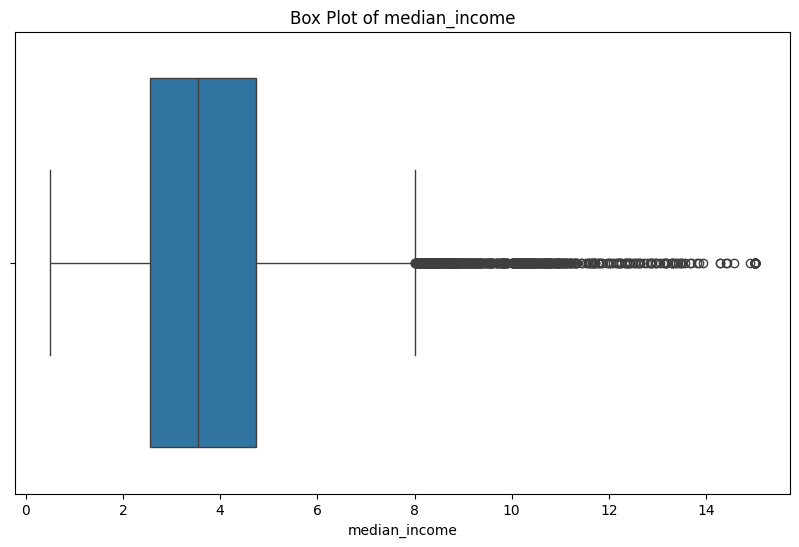

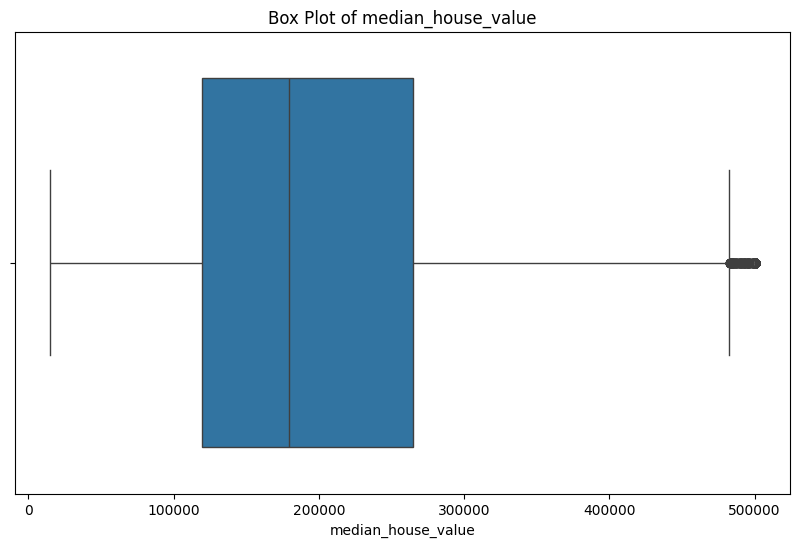

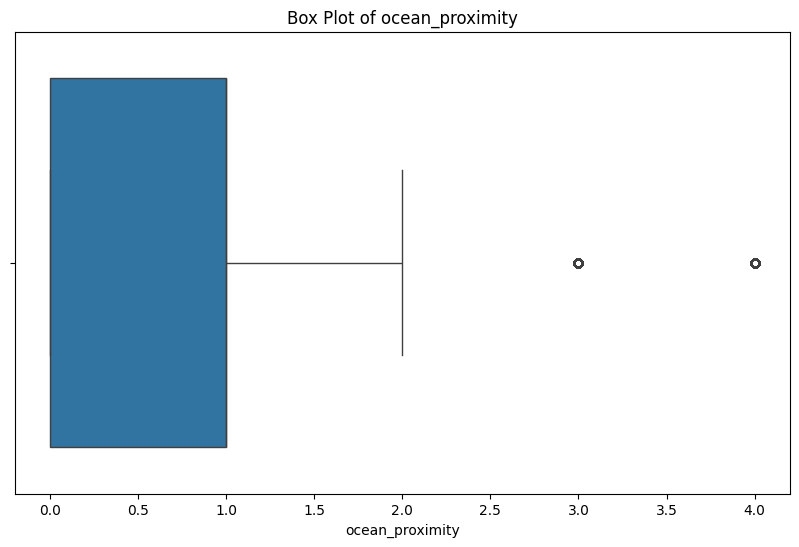

In [11]:
# Plotting correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include="number").corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

for column in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


(a)Strong correlation means high correlation coefficients,correlation coefficients close to 1 or -1.
  (i)Positive Correlation: A strong positive correlation indicates that as one feature increases, the other also tends to increase, correlation coefficient close to 1.
  Ex: household and total_bedrooms(0.97), total_bedrooms and total_rooms(0.93), household and total_rooms(0.92).
  (ii)Negative Correlation: A strong negative correlation indicates  that as one feature increases, the other tends to decrease, correlation coefficient close to -1.
  Ex: latitude and longitude(-0.92).

(b)Outliers: Points that fall outside the whiskers of the box,extreme values in the dataset.Outliers are present in total_bedrooms, total_rooms, population, household, in ocean_proximity only few points are there as outlier and in median_income.

(c) Distribution Shape:
Skewness: Features that are right-skewed like total_bedrooms may require transformation (ex: log transformation) to stabilize variance for modeling.
Kurtosis: Features with high kurtosis may have more outliers, indicating that they are not normally distributed.
Feature Relevance: Features that show a wide range of values or significant differences in medians across categories may be more important for predictive modeling.


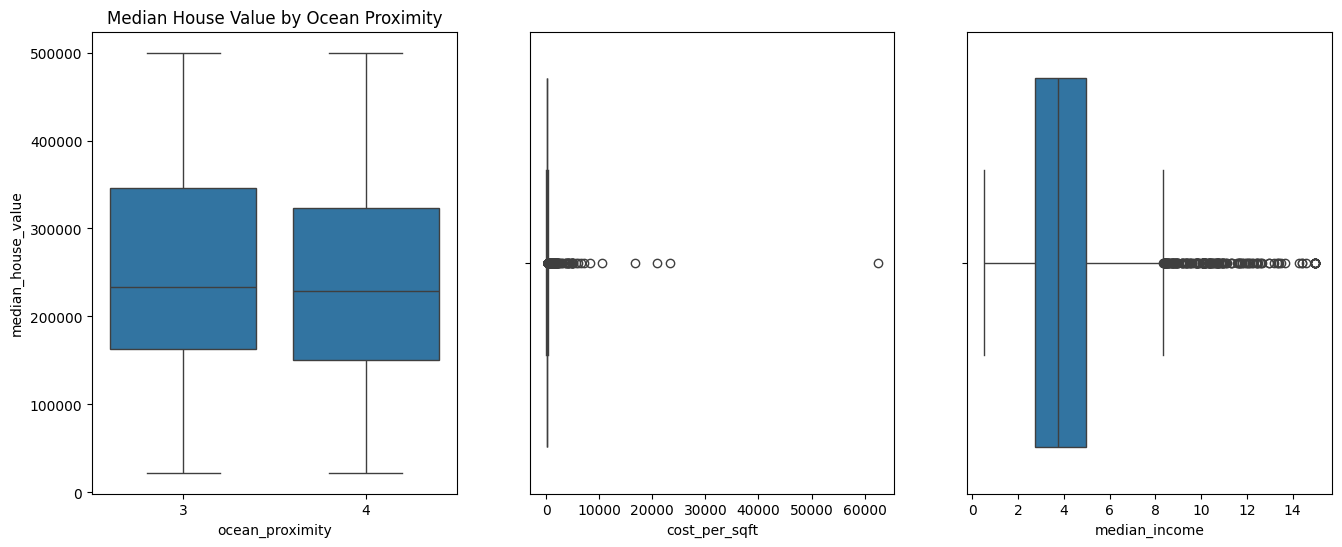

In [12]:

# Calculating cost per square foot
df['cost_per_sqft'] = df['median_house_value'] / df['total_rooms']

mapping = {
    0: '<1H OCEAN',
    1: 'INLAND',
    2: 'NEAR BAY',
    3: 'NEAR OCEAN',
    4: 'ISLAND'
}

# Define premium houses
filtered_df = df[df['ocean_proximity'].isin([3,4])]

plt.figure(figsize=(16, 6))

plt.subplot(1,3,1)
sns.boxplot(x='ocean_proximity', y='median_house_value', data = filtered_df)
plt.xlabel('ocean_proximity')
plt.ylabel('median_house_value')
plt.title('Median House Value by Ocean Proximity')

plt.subplot(1,3,2)
sns.boxplot(x='cost_per_sqft', data = filtered_df)

plt.subplot(1,3,3)
sns.boxplot(x='median_income', data = filtered_df)

plt.show()


Question 12)

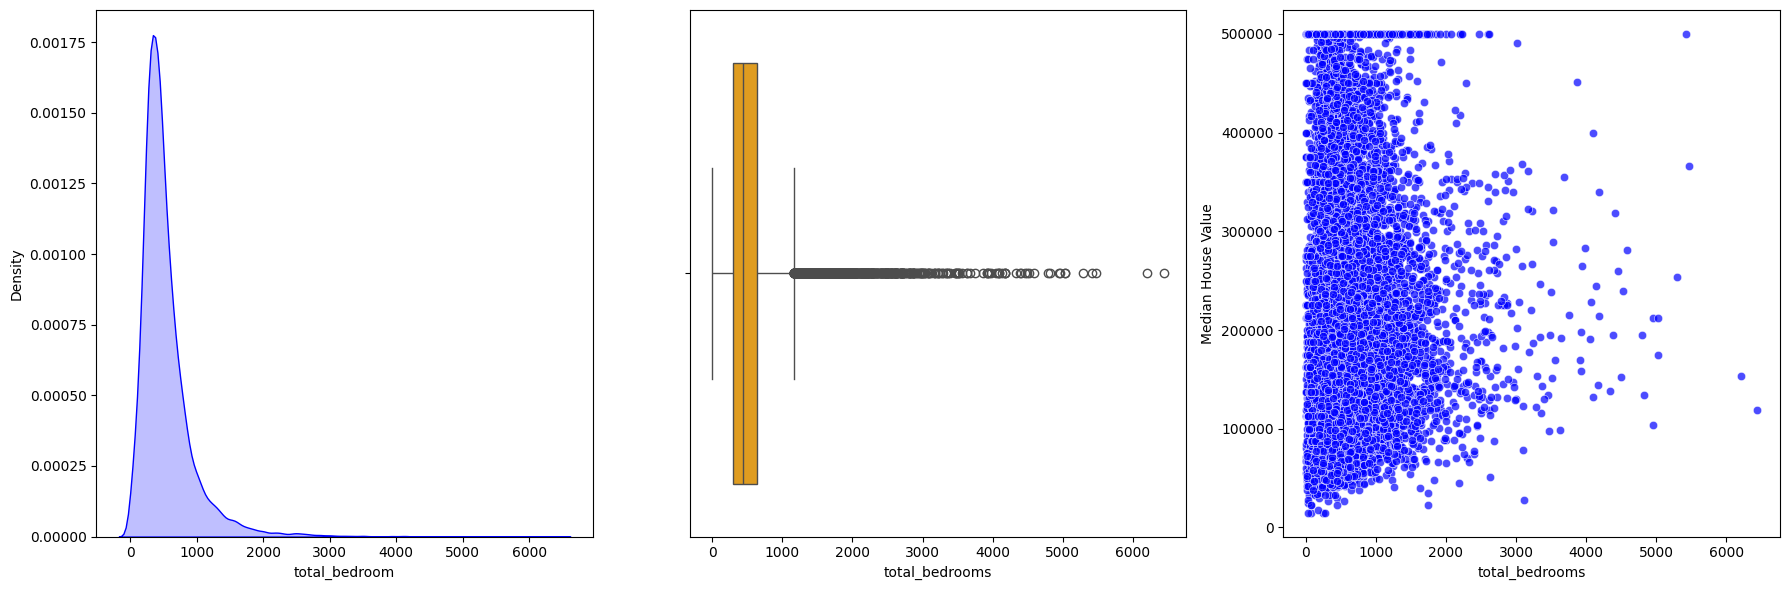

In [13]:
# Create a figure with three subplots
plt.figure(figsize=(18, 6))

# Subplot 1: Kernel Density Estimate (KDE) Plot
plt.subplot(1, 3, 1)
sns.kdeplot(data=df['total_bedrooms'], fill=True, color='blue')
plt.xlabel('total_bedroom')
plt.ylabel('Density')

# Subplot 2: Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['total_bedrooms'], color='orange')
plt.xlabel('total_bedrooms')

# Subplot 3: Scatter Plot against 'median_house_value'
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['total_bedrooms'], y=df['median_house_value'], color='blue', alpha=0.7)
plt.xlabel('total_bedrooms')
plt.ylabel('Median House Value')

# Adjusting layout
plt.tight_layout()
plt.show()

Question 13)

Mean: 206855.81690891474
Standard Deviation:  115395.6158744132
Lower Bound:  -23935.414839911653
Upper Bound:  437647.04865774116
Total number of outliers in median_house_value:  1383


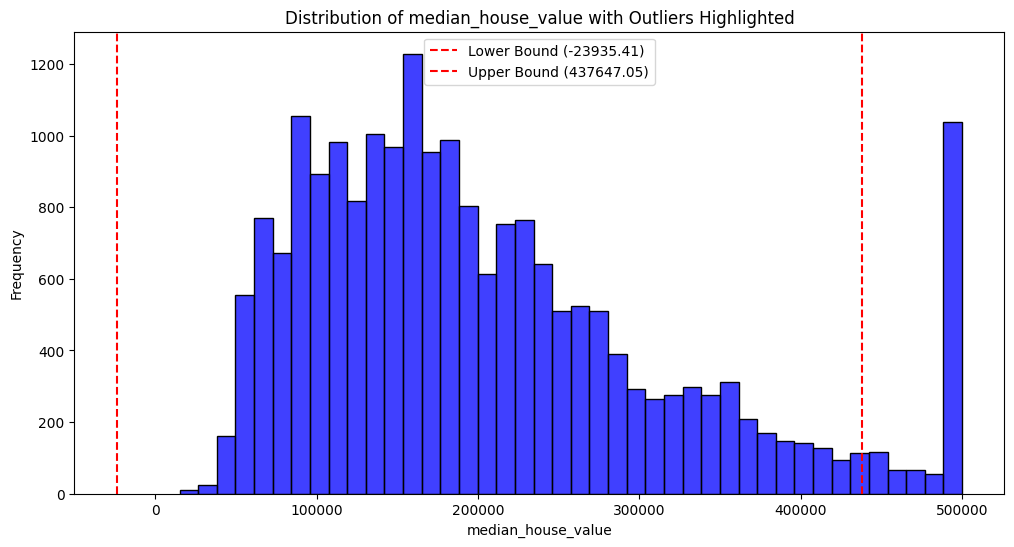

In [14]:
column = "median_house_value"
mean = df[column].mean()
std_dev = df[column].std()

# Calculating lower and upper bounds
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

num_outliers = outliers.shape[0]  # Returns no. of rows in stored in outliers

print("Mean:" ,mean)
print("Standard Deviation: ",std_dev)
print("Lower Bound: ",lower_bound)
print("Upper Bound: ",upper_bound)
print("Total number of outliers in median_house_value: ", num_outliers)
plt.figure(figsize=(12, 6))
sns.histplot(df[column],bins = 42, color='blue')  # bin value is taken as 42 to match the figure in the problem statement

# Highlight the outlier regions
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})' )
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')

plt.title(f'Distribution of median_house_value with Outliers Highlighted')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.legend()
plt.show()

Question 14)

In [15]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# MinMaxScaler
mm_scaler = MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)

# StandardScaler
s_scaler = StandardScaler()
x_s = s_scaler.fit_transform(x)

x_mm_df = pd.DataFrame(x_mm, columns=x.columns)
x_s_df = pd.DataFrame(x_s, columns=x.columns)

# Comparing results using describe
print("MinMax Scaled Data Description:")
print(x_mm_df.describe())

print("\nStandard Scaled Data Description:")
print(x_s_df.describe())

MinMax Scaled Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean       0.476125      0.328572            0.541951      0.066986   
std        0.199555      0.226988            0.246776      0.055486   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.253984      0.147715            0.333333      0.036771   
50%        0.583665      0.182784            0.549020      0.054046   
75%        0.631474      0.549416            0.705882      0.080014   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean         0.083153      0.039869      0.081983       0.232464   
std          0.065083      0.031740      0.062873       0.131020   
min          0.000000      0.000000      0.000000       

**MinMaxScaler:**  MinMaxScaler scales features to a given range, typically [0, 1] using the min and max values of each feature.

*Benefits:* Ensures all features are within a specific range, making it useful for algorithms sensitive to the scale of data, like neural networks.Retains the original distribution of data, which can be beneficial for maintaining relationships between features. Doesn’t work well with features that have very different ranges, which can lead to distorted results.

*Drawbacks:* Sensitive to outliers since it scales the data based on the minimum and maximum values. Outliers can distort the scaling, leading to skewed results.

**StandardScaler:** StandardScaler standardizes features by removing the mean and scaling to unit variance. The result is a distribution with a mean of 0 and a standard deviation of 1.

*Benefits:* Scales the data to have a mean of 0 and a standard deviation of 1, which is useful for algorithms that assume normally distributed data, like linear regression, SVM, and PCA. Ensures that features with larger scales do not dominate the model learning process.

*Drawbacks:* Also sensitive to outliers, as it uses the mean and standard deviation of the data, which can be influenced by extreme values.It works best with normally distributed data, so for non-Gaussian distributions, this method may not be ideal.

**Additional Scaling Methods**

In [16]:
# RobustScaler
r_scaler = RobustScaler()
x_r = r_scaler.fit_transform(x)

# QuantileTransformer
q_scaler = QuantileTransformer()
x_q = q_scaler.fit_transform(x)

# PowerTransformer
p_transformer = PowerTransformer()
x_p = p_transformer.fit_transform(x)

# Convert to DataFrame for comparison
x_r_df = pd.DataFrame(x_r, columns=df.drop(['median_house_value'], axis=1).columns)
x_q_df = pd.DataFrame(x_q, columns=df.drop(['median_house_value'], axis=1).columns)
x_p_df = pd.DataFrame(x_p, columns=df.drop(['median_house_value'], axis=1).columns)

# Compare using describe
print("Robust Scaled Data Description:")
print(x_r_df.describe())

print("\nQuantile Transformed Data Description:")
print(x_q_df.describe())

print("\nPower Transformed Data Description:")
print(x_p_df.describe())


Robust Scaled Data Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean      -0.284882      0.362926           -0.018974      0.299228   
std        0.528636      0.565067            0.662398      1.283114   
min       -1.546174     -0.455026           -1.473684     -1.249816   
25%       -0.873351     -0.087302           -0.578947     -0.399500   
50%        0.000000      0.000000            0.000000      0.000000   
75%        0.126649      0.912698            0.421053      0.600500   
max        1.102902      2.034392            1.210526     21.875018   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   2.064000e+04   
mean         0.294119      0.276628      0.278584   1.540799e-01   
std          1.211240      1.207316      1.176399   8.715378e-01   
min         -1.253430     -1.239872     -1.255385  -1.39

**RobustScaler:**
Scales features according to the median and interquartile range, making it robust to outliers.
Advantages: Less sensitive to outliers compared to MinMaxScaler and StandardScaler, making it suitable for datasets with significant outliers.

**QuantileTransformer:**
Transforms the data to follow a uniform or normal distribution.
Advantages: Good for making features more Gaussian-like, which can improve the performance of linear models. It’s also less sensitive to outliers.

**PowerTransformer:**
Applies a power transformation to make the data more Gaussian-like, using either a Yeo-Johnson or Box-Cox transformation.
Advantages: Useful for making skewed distributions more normal, which is beneficial for models that assume normality.

RobustScaler might be preferred if dataset contains significant outliers. Since it uses the median and IQR, it is less affected by outliers than both MinMaxScaler and StandardScaler.

QuantileTransformer is useful if we to transform our data to a uniform or normal distribution. This can be helpful when the data is highly skewed, or when a specific distribution is needed for a particular model.

PowerTransformer is suitable for transforming data to reduce skewness and make the distribution more Gaussian. This can be particularly beneficial when dealing with non-normal data distributions.